# <u>Introduction<u>

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher.The Iris dataset is a classic dataset for classification, machine learning, and data visualization.
In this notebook I'm going to do an end to end project of Machine Learning in which we will take SepalLength, SepalWidth, PetalLength, PetalWidth an input and will predict the species of the flower.

In this project I have used 3 Machine learning algorithm.

-Random forest

-Decision Tree

-Logistic Regression

The dataset was collected from Kaggle and is basically a toy dataset.


The dataset contains a set of 150 records under 5 attributes:-

<br>-sepal length in cm<br>
<br>-sepal width in cm<br>
<br>-petal length in cm<br>
<br>-petal width in cm<br>
<br>-Species: -- Iris Setosa -- Iris Versicolour -- Iris Virginica<br>
    




<img src="0_Uw37vrrKzeEWahdB.jpg" width="1838" height="551">

# <u>Required libraries<u>

Numpy:- Provides a fast numerical array structure and helper functions.

pandas:- Provides a DataFrame structure to store data in memory and work with it easily and efficiently.

Matplotlib:- Basic plotting library in Python; most other Python plotting libraries are built on top of it.

seaborn:- Advanced statistical plotting library.

scikit-learn: The essential Machine Learning package in Python.

pickle:-Python pickle module is used for serializing and de-serializing a Python object structure.

# <u>Data Loading<u>

<u>Importing the dataset using pandas<u>

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Importing Data
data=pd.read_csv('iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# <u>Data Exploration<u>

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data['Name'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Name, dtype: int64

# <u>Data Visualization<u>

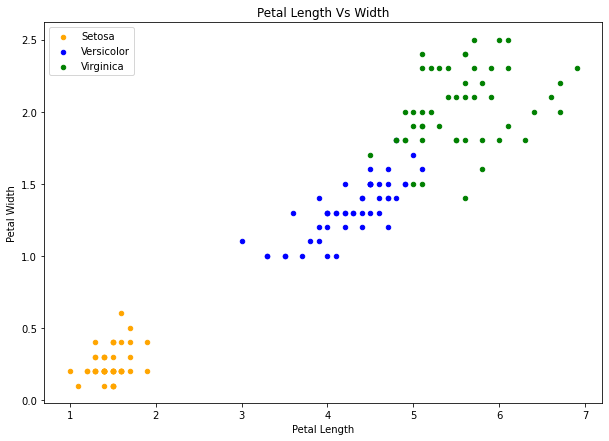

In [9]:
fig = data[data.Name == 'Iris-setosa'].plot(kind='scatter', x='PetalLength', y='PetalWidth', color='orange', label='Setosa')
data[data.Name == 'Iris-versicolor'].plot(kind='scatter', x='PetalLength', y='PetalWidth', color='blue', label='Versicolor', ax=fig)
data[data.Name == 'Iris-virginica'].plot(kind='scatter', x='PetalLength', y='PetalWidth', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')   #Setting the label for the x-axis
fig.set_ylabel('Petal Width')    ##Setting the label for the y-axis
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

The plot showing the histogram representation of each column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9E6819BA8>,
      dtype=object)

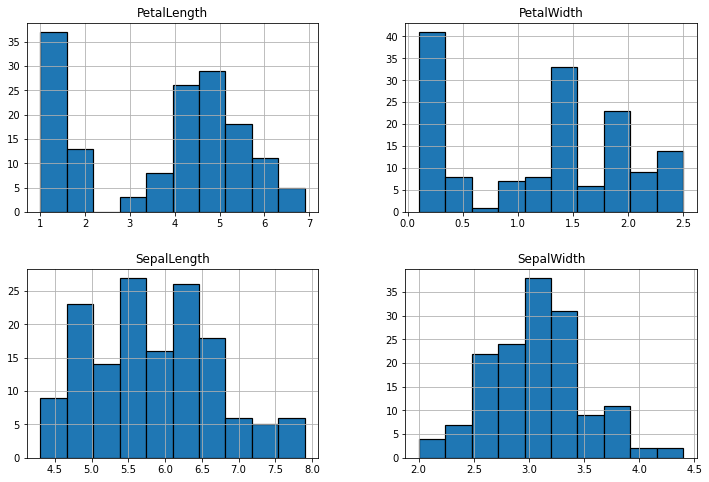

In [10]:
data.hist(edgecolor='black', linewidth=1.2 , figsize=(12,8))

# <u>Data Preprocessing<u>

For modeling I have seperated the target coulumn and input column as iris_target and iris_data.

After data seperating the data is stored inside a numpy array of shape(150,4)

In [11]:
#seperating X
iris_data=data.iloc[:,:4].values
iris_data.shape

(150, 4)

In [12]:
#Seperating Y
iris_target=data.iloc[:,4].values
iris_target

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

<u>Splitting The Data into Training And Testing Dataset<u>

We have splitted our data in 80:20 80% data will be used for training and 20% data will be used for testing.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


# <u>Developing a Model<u>

In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. In this project I have used 3 most Machine learning algorithms.

Now the given problem is a classification problem. Thus we will be using the classification algorithms to build our model.

-Decision Tree

-Logistic Regression

-Random forest


I have used a grid search to get the best parameters.

To test the accuracy of the model I have used k-fold Cross-Validation.10-fold cross-validation is the most common choice, so let's use that here.

# <u>Decision Tree<u> 

Using grid search for hyperparameter optimization for Decision Tree Classifier.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],'min_samples_split':[2,3,4,5,6,7,8], 'min_samples_leaf':[1,2,3,4,5], 'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)

C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT_MODEL = DecisionTreeClassifier(max_depth=2,criterion = 'gini',min_samples_leaf = 1, max_leaf_nodes = 4,min_samples_split= 2)
DT_MODEL = DT_MODEL.fit(X_train,y_train,)

#Accuracy on train data

In [35]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(DT_MODEL,X_train,y_train,cv=10)
score.mean()

0.9694805194805195

#Accuracy on test data

In [36]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(DT_MODEL,X_test,y_test,cv=10)
score.mean()

C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.975

# <u>Logistic regression<u>

In [30]:
from sklearn.linear_model import LogisticRegression as lr
LR_MODEL = lr(solver='lbfgs', multi_class='multinomial', random_state=42)  #solver=lbfgh is gradient decent
LR_MODEL.fit(X_train,y_train)

C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

#Accuracy on train data

In [19]:
score=cross_val_score(DecisionTreeClassifier,X_train,y_train,cv=10)
score.mean()

0.9694805194805195

# <u>Random Forest<u>

Using grid search for hyperparameter optimization for Random Forest Classifier.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
parameters = {'criterion':['entropy','gini']}#, 'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],'min_samples_split':[2,3,4,5,6,7,8], 'min_samples_leaf':[1,2,3,4,5], 'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)

C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Use

GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
grid.best_params_

{'criterion': 'gini'}

In [39]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100)#criterion = 'entropy',max_depth=9, min_samples_split = 7)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Accuracy on train data

In [37]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rnd_clf,X_train,y_train,cv=10)
score.mean()

0.9512987012987013

# <u>Prediction based on given data<u>

In [31]:
#prediction based on given data
y_pred=LR_MODEL.predict(iris_data)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [41]:
rnd_clf .predict([[5.1,3.5,1.4,0.2]])

array(['Iris-setosa'], dtype=object)

# <u>*Summary*:-<u>
    
As we have finished training our 3 models what we have analyzed is that the accurate summary of the 3 model is-

*-Random forest-95.12%*

*-Decision Tree-96.94%*

*-Logistic Regression-96.94%*

So the accuracy is almost the same in each case and this finishes our project. We have explored the data and understand the working of these particular algorithms. 

But should the model be used in a real-world setting?

This model cannot be used in a real-world setting because of the less amount of data.
But after completing this project I have learned how to do a project in data science from collecting data to understanding the working of these particular algorithms.

I am still learning! :)